In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.utils as utils
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

In [ ]:
data = load_wine()
X = data.data
y = data.target
idx = [i for i in range(len(y)) if y[i] != 2]
X = X[idx]
y = y[idx]
X = StandardScaler().fit_transform(X)

In [ ]:
print(y.shape)
print(X.shape)

(130,)
(130, 13)


In [ ]:
X, y = utils.shuffle(X, y, random_state = 3)

In [ ]:
print(y[:10])
print(X[0])

[0 1 1 1 0 0 1 0 0 0]
[ 1.05712867 -0.0890702   0.84298752 -1.11750469  0.0717917   1.33870579
  1.45593625 -1.47451854 -0.09746111  0.76271547 -1.06458328  1.27946422
  0.86830046]


In [ ]:
X = np.hstack((np.ones((len(X),1)),X))

In [ ]:
print(X.shape)

(130, 14)


In [ ]:
print(X[0])

[ 1.          1.05712867 -0.0890702   0.84298752 -1.11750469  0.0717917
  1.33870579  1.45593625 -1.47451854 -0.09746111  0.76271547 -1.06458328
  1.27946422  0.86830046]


In [ ]:
logistic_regression = LogisticRegression(penalty=None,fit_intercept=False)
logistic_regression.fit(X,y)
y_pred = logistic_regression.predict_proba(X)
weights = logistic_regression.coef_
logistic_loss = log_loss(y, y_pred, normalize=False)

In [ ]:
print(weights.shape)

(1, 14)


In [ ]:
print('logistic regression loss=', logistic_loss) #this is sum of all sample log loss, not averaged

logistic regression loss= 9.480169067119548e-05


In [ ]:
print('logistic regression weights', weights)

logistic regression weights [[  0.44892414 -10.26521716  -3.64484291  -9.47794415  11.39096
   -1.50385118   0.310449    -3.3173154    1.7470717    1.66698924
   -2.49903833   1.01682515  -5.61306123 -15.49726904]]


In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
def calc_loss(X,y,w):
  y = y.reshape((len(y),1))
  y_pred = sigmoid(X.dot(w.T))
  return -np.sum(np.dot(y.T, np.log(y_pred + 1e-11)) + np.dot((1-y).T, np.log(1 - y_pred + 1e-11)))

In [ ]:
print(calc_loss(X,y,weights))

9.480039065715029e-05


In [ ]:
def calc_grad(X, y, w):
  y = y.reshape((len(y),1))
  y_pred = sigmoid(X.dot(w.T))
  return X.T.dot(y_pred - y)

In [ ]:
def backtrack_line_search(X, y, w, direction, beta=0.90, c=0.5):
  alpha = 1.0
  loss = calc_loss(X, y, w)
  norm = np.linalg.norm(direction, ord=2)
  while True:
    if calc_loss(X, y, w - alpha * direction) <= loss - alpha * c * (norm ** 2):
      break
    alpha = beta * alpha

  return alpha

In [ ]:
def coordinate_descent(X, y, max_iter=20000, rand_idx=False, backtrack_search = True):
  w = np.random.normal(0, 0.01, (1,X.shape[1]))
  #print(w.shape)
  #print(w)
  iterations = [0]
  loss_list = [calc_loss(X,y,w)]
  for i in range(max_iter):
    gradient = calc_grad(X, y, w)
    gradient = gradient.reshape((14,))
    #print(gradient.shape)
    if rand_idx:
      idx = np.random.randint(14)
    else:
      idx = np.argmax(np.absolute(gradient))
    gradient = np.array([gradient[j] if j == idx else 0 for j in range(14)])
    step_size = 0.008
    if backtrack_search:
      step_size = backtrack_line_search(X, y, w, gradient)
    w = w - step_size * gradient
    curr_loss = calc_loss(X, y, w)
    loss_list.append(curr_loss)
    iterations.append(i+1)
  print('Final loss =', loss_list[-1])
  return w, loss_list, iterations

In [ ]:
coordinate_descent(X, y)

In [ ]:
def plot(rand_iters, maxidx_iters, rand_losses, maxidx_losses):
    plt.title('Training Loss Curve with Fixed step size, Total ' + str(len(rand_iters)-1) + ' Iterations' )
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.semilogy(rand_iters, np.array(rand_losses).reshape(-1, 1), 'r', label='test')
    plt.semilogy(maxidx_iters, np.array(maxidx_losses).reshape(-1, 1), 'b')
    plt.axhline(y=logistic_loss, color='g', linestyle='--')
    plt.legend(('random coordinate selection', 'max gradient coordinate selection', 'target final loss'))
    plt.show()

In [ ]:
def plot_line_search(rand_iters, maxidx_iters, rand_losses, maxidx_losses):
    plt.title('Training Loss Curve with Backtracking Line search, Total ' + str(len(rand_iters)-1) + ' Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.semilogy(rand_iters, np.array(rand_losses).reshape(-1, 1), 'r', label='test')
    plt.semilogy(maxidx_iters, np.array(maxidx_losses).reshape(-1, 1), 'b')
    plt.axhline(y=logistic_loss, color='g', linestyle='--')
    plt.legend(('random coordinate selection', 'max gradient coordinate selection', 'target final loss'))
    plt.show()

Final loss = 0.4678385729126754
Final loss = 0.9069983585924187


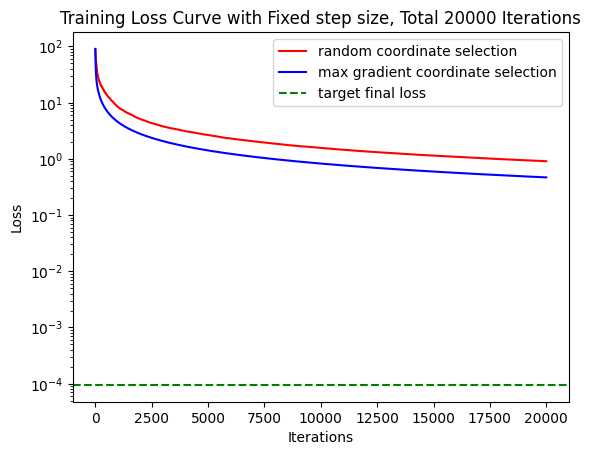

In [41]:
w_max, loss_max, iter_max = coordinate_descent(X, y, backtrack_search=False)
w_rand, loss_rand, iter_rand = coordinate_descent(X, y, rand_idx=True, backtrack_search=False)
plot(iter_rand, iter_max, loss_rand, loss_max)

Final loss = 0.09595239325953805
Final loss = 0.20220771083231043


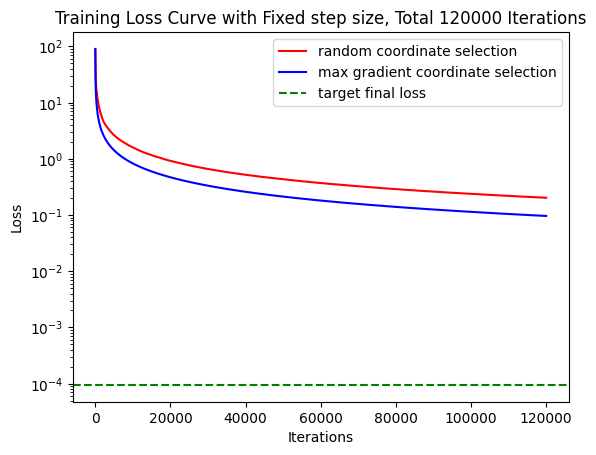

In [40]:
w_max, loss_max, iter_max = coordinate_descent(X, y, max_iter = 120000, backtrack_search=False)
w_rand, loss_rand, iter_rand = coordinate_descent(X, y, max_iter = 120000, rand_idx=True, backtrack_search=False)
plot(iter_rand, iter_max, loss_rand, loss_max)

Final loss = 0.0013537436402323913
Final loss = 0.003155432974182416


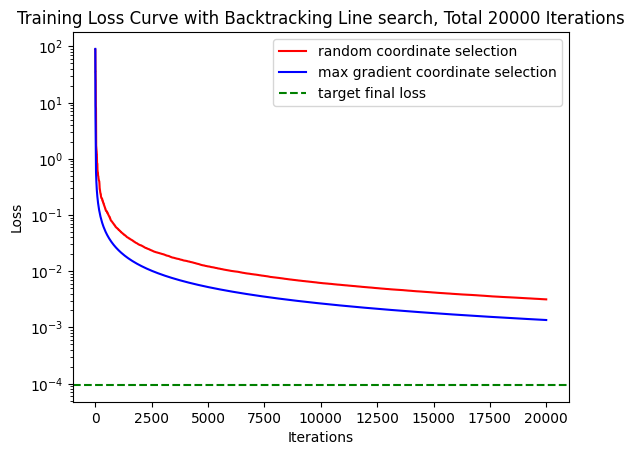

In [ ]:
w_max, loss_max, iter_max = coordinate_descent(X, y)
w_rand, loss_rand, iter_rand = coordinate_descent(X, y, rand_idx=True)
plot_line_search(iter_rand, iter_max, loss_rand, loss_max)

Final loss = 0.00023075296204183538
Final loss = 0.0005332154834387425


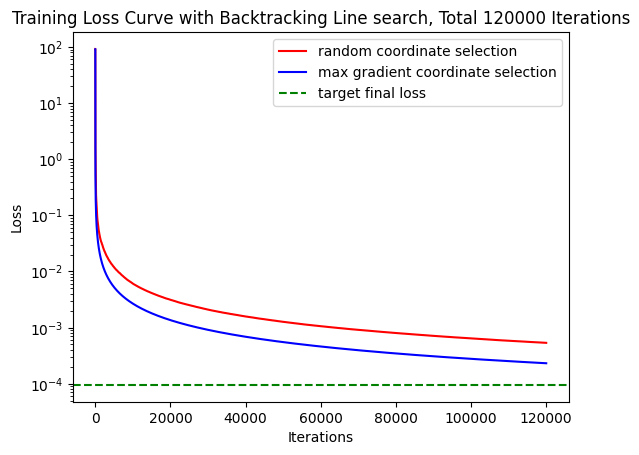

In [ ]:
w_max, loss_max, iter_max = coordinate_descent(X, y, max_iter = 120000)
w_rand, loss_rand, iter_rand = coordinate_descent(X, y,max_iter = 120000, rand_idx=True)
plot_line_search(iter_rand, iter_max, loss_rand, loss_max)